In [0]:
import keras
keras.__version__

'2.3.1'

# Python Keras MNIST 手寫辨識

這是一個神經網路的範例，利用了 Python Keras 來訓練一個手寫辨識分類 Model。

我們要的問題是將手寫數字的灰度圖像（28x28 Pixel）分類為 10 類（0至9）。使用的數據集是 MNIST 典數據集，它是由國家標準技術研究所（MNIST 的 NIST）在1980年代組裝而成的，包含 60,000 張訓練圖像和 10,000 張測試圖像。您可以將「解決」MNIST 視為深度學習的 "Hello World"。

由於 Keras 已經整理了一些經典的 Play Book Data，因此我們可以很快透過以下方式取得 MNIST 資料集

In [0]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

images 是用來訓練與測試的資料，label 則為每一筆影像資料對應的正確答案，每一張手寫圖片都是 28 x 28 的灰階 Bit Map

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

In [0]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

上面這裡是神經網路的核心組成方式，我們在全連接層建立了兩層，由一個有 512 個神經元的網路架構連接到 10 個神經元的輸出層。輸出層採用 softmax 表示數字 0~9 的機率分配，這 10 個數字的總和將會是 1。以下將我們建立的網路進行 compile，這裡詳細的參數以後會介紹。

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


以下將資料正規劃成為 0~1 的數值，變成 60000, 28x28 Shape 好送進上面定義的網路輸入層。

In [0]:
fix_train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
fix_test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

由於我們使用的 categorical_crossentropy 損失函數，因此將標記資料進行格式轉換。如下：

In [0]:
from keras.utils import to_categorical

fix_train_labels = to_categorical(train_labels)
fix_test_labels = to_categorical(test_labels)

進行訓練模型，訓練中的正確率應該會在 0.989 左右

In [0]:
result = network.fit(
    fix_train_images,
    fix_train_labels,
    epochs=20,
    batch_size=128,
    validation_data=(fix_test_images, fix_test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2560 - accuracy: 0.9257 - val_loss: 0.1405 - val_accuracy: 0.9563
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.1019 - accuracy: 0.9699 - val_loss: 0.1025 - val_accuracy: 0.9681
Epoch 3/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0680 - accuracy: 0.9800 - val_loss: 0.0757 - val_accuracy: 0.9763
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0495 - accuracy: 0.9850 - val_loss: 0.0696 - val_accuracy: 0.9776
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0373 - accuracy: 0.9891 - val_loss: 0.0630 - val_accuracy: 0.9805
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0286 - accuracy: 0.9915 - val_loss: 0.0607 - val_accuracy: 0.9828
Epoch 7/20
60000/60000 [==============================] - 1s 22us/st

將訓練後的模型輸入測試資料進行評比，一般說這樣的正確率應該會在 0.977% 左右

In [0]:
test_loss, test_acc = network.evaluate(fix_test_images, fix_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 44us/step
test_loss: 0.09919960885650923
test_acc: 0.9810000061988831



為什麽訓練時的正確率會高於驗證測試呢？在這樣數據中，由於模型訓練時對訓練資料造成些微的過度擬合 (Over Fitting) 。一般來說這樣的情況是正常的，未來我們可以透過參數的調整或其他方法提高正確性。

# 透過圖表協助分析訓練過程

由於訓練 Model 時會進行好幾次的 Epoch，每一次 Epoch 都是對訓練資料集進行一輪完整的訓練，妥善觀察每一次 Epoch 的數據是很重要地。我們可以透過 matplotlib 函式庫繪製圖表，幫我們進行分析。

以下方式可以繪製訓練過程 Loss Function 對應的損失分數。Validation loss 不一定會跟隨 Training loss 一起降低，當 Model Over Fitting Train Data 時，就會發生 Validation loss 上升的情況。

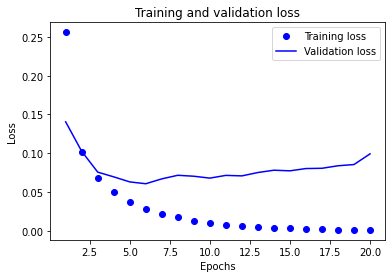

In [0]:
history_dict = result.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


以下程式可以繪製訓練過程的正確率變化。訓練的過程中，當 Accuracy 後期並有沒太大的變化，表示 Model 很快就在假設空間裡進行不錯的收斂。

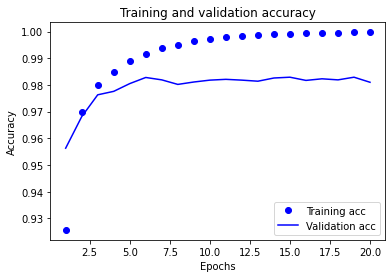

In [0]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
